In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,NaN,NaN,0.51035,0.03043,0.10066
1,0.029389,0.206580,NaN,1.43430,3.12990,1.27780,1.42850,NaN,1.19480,2.13180,0.98473,3.84450
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,NaN,1.51440,2.43890,0.63358
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,NaN,3.93810,3.73460
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.94706
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,NaN
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.75560
397,-3.479100,-1.993300,1.32480,1.77210,NaN,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.12380
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	20
float64		column 2	17
float64		column 3	26
float64		column 4	12
float64		column 5	17
float64		column 6	16
float64		column 7	25
float64		column 8	25
float64		column 9	20
float64		column 10	23
float64		column 11	17
float64		column 12	22


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,380.000000,383.000000,374.000000,388.000000,383.000000,384.000000,375.000000,375.000000,380.000000,377.000000,383.000000,378.000000
mean,-0.109402,0.024508,2.018671,1.904483,1.936711,1.997991,2.022165,2.006105,1.978999,2.028357,1.948042,1.972366
std,2.569264,2.758029,1.133628,1.146186,1.163946,1.138420,1.148923,1.147806,1.137301,1.159628,1.154939,1.194348
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.044882,0.003618,0.007321,0.007216,0.055837,0.006786,0.001972
25%,-0.683635,-0.831840,1.118600,0.947260,0.879360,1.049175,1.002765,1.032200,1.083725,1.040100,0.909230,0.912077
50%,-0.074609,0.021200,2.059000,1.807600,1.898800,2.031600,2.100400,2.000400,2.074650,2.087700,1.883300,1.943700
75%,0.763967,0.887430,2.980825,2.836900,2.955350,2.969325,2.952300,3.054950,2.943050,3.040000,2.965850,3.015725
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

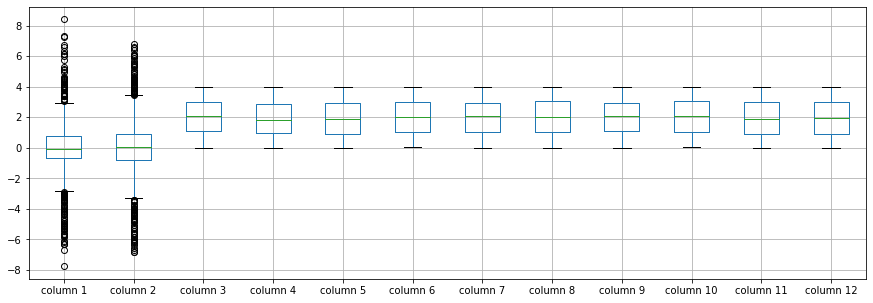

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.109402
column 2     0.024508
column 3     2.018671
column 4     1.904483
column 5     1.936711
column 6     1.997991
column 7     2.022165
column 8     2.006105
column 9     1.978999
column 10    2.028357
column 11    1.948042
column 12    1.972366
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.043360,-0.028102,-0.074686,0.013038,-0.005184,-0.023258,0.001515,-0.043939,0.036752,0.084077,-0.025824
column 2,0.043360,1.000000,-0.037436,0.040486,-0.083720,-0.080045,0.016898,0.001288,-0.022770,-0.017428,-0.048922,0.070883
column 3,-0.028102,-0.037436,1.000000,-0.007798,-0.017429,-0.067157,-0.090315,0.064890,0.102405,-0.014586,-0.094952,0.006263
column 4,-0.074686,0.040486,-0.007798,1.000000,-0.011042,0.108401,-0.008469,0.075845,-0.005171,0.065572,-0.038054,-0.058162
column 5,0.013038,-0.083720,-0.017429,-0.011042,1.000000,0.098674,-0.008310,-0.039113,0.003667,0.031749,0.025389,-0.054957
column 6,-0.005184,-0.080045,-0.067157,0.108401,0.098674,1.000000,-0.003098,0.045843,0.008603,-0.023711,0.051695,-0.073299
column 7,-0.023258,0.016898,-0.090315,-0.008469,-0.008310,-0.003098,1.000000,-0.029270,0.100598,0.047474,0.008860,-0.045936
column 8,0.001515,0.001288,0.064890,0.075845,-0.039113,0.045843,-0.029270,1.000000,0.048315,-0.120651,-0.052613,-0.012674
column 9,-0.043939,-0.022770,0.102405,-0.005171,0.003667,0.008603,0.100598,0.048315,1.000000,0.009558,0.013778,0.056488
column 10,0.036752,-0.017428,-0.014586,0.065572,0.031749,-0.023711,0.047474,-0.120651,0.009558,1.000000,0.026676,0.012717


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+24,12+24+24,12+24+24+24,12+24+24+24+24,12+24+24+24+24+24,12+24+24+24+24+24+24,12+24+24+24+24+24,12+24+24+24+24,12+24+24+24,12+24+24,12+24,12], vae_layer = False, seed = 12)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.573756103515624
Epoch: 1 , loss: 26.51248519897461
Epoch: 2 , loss: 26.398176040649414
Epoch: 3 , loss: 26.317804641723633
Epoch: 4 , loss: 26.31476013183594
Epoch: 5 , loss: 26.033094635009764
Epoch: 6 , loss: 25.356000747680664
Epoch: 7 , loss: 23.4254598236084
Epoch: 8 , loss: 22.427820892333983
Epoch: 9 , loss: 22.201167221069337
Epoch: 10 , loss: 21.953423385620116
Epoch: 11 , loss: 21.369817504882814
Epoch: 12 , loss: 21.188674697875978
Epoch: 13 , loss: 20.930857467651368
Epoch: 14 , loss: 20.509412155151367
Epoch: 15 , loss: 20.50214988708496
Epoch: 16 , loss: 20.130433349609376
Epoch: 17 , loss: 19.972550048828126
Epoch: 18 , loss: 19.824215393066407
Epoch: 19 , loss: 19.559866256713867
Epoch: 20 , loss: 19.569843063354494
Epoch: 21 , loss: 19.23012939453125
Epoch: 22 , loss: 19.33380874633789
Epoch: 23 , loss: 19.400992736816406
Epoch: 24 , loss: 19.10693519592285
Epoch: 25 , loss: 18.8461

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.057905
column 2     0.017698
column 3     1.058100
column 4     2.136200
column 5     2.148600
column 6     2.245800
column 7     3.727700
column 8     2.227200
column 9     1.943500
column 10    1.987000
column 11    2.470700
column 12    0.368260
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,-2.561451,-0.265828,0.000000,0.000000,0.000000
1,0.0,0.0,0.758044,0.0,0.000000,0.0,0.0,1.143227,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,-1.512804,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,-1.167941,0.000000,0.000000
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-0.968996
396,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
397,0.0,0.0,0.000000,0.0,-1.516193,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
398,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.649204


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(26.13869365086151, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.16009051104331215

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.83630,2.886600,2.46960,0.21541,0.528549,0.517602,0.510350,0.030430,0.100660
1,0.029389,0.206580,1.246654,1.43430,3.129900,1.27780,1.42850,1.286557,1.194800,2.131800,0.984730,3.844500
2,-1.115400,0.217560,1.610500,1.33710,3.768200,1.21000,3.99630,2.217300,2.390096,1.514400,2.438900,0.633580
3,-0.539160,-0.061874,0.364860,0.33278,0.190270,0.56716,1.66010,2.352700,0.661260,1.967159,3.938100,3.734600
4,-0.268400,-1.006000,2.882200,1.56160,3.201400,3.37740,1.52260,0.984750,3.109400,3.656400,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.70480,0.882690,0.35406,1.62780,3.294000,1.085000,0.157400,0.465040,1.882404
396,0.264630,-6.107600,3.905400,1.33770,1.418700,1.68610,1.09510,3.793600,0.127900,0.542490,3.365800,3.755600
397,-3.479100,-1.993300,1.324800,1.77210,1.034707,1.47010,0.92540,1.841100,3.477300,0.954960,1.526300,2.123800
398,7.293000,-0.411470,2.494800,0.39655,2.999000,3.41010,2.95160,0.278000,0.990590,3.437400,1.816200,1.736416


In [20]:
imputations[-1].to_excel("Difdoug_C_5(imp).xlsx", index=False, header=False)